In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X = mnist['data']
y = mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import pandas as pd
y = pd.Series(y)

In [7]:
type(y)

pandas.core.series.Series

In [8]:
y.value_counts()

1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
dtype: int64

In [9]:
X = pd.DataFrame(X)

In [10]:
x = X.iloc[5000,]

(-0.5, 27.5, 27.5, -0.5)

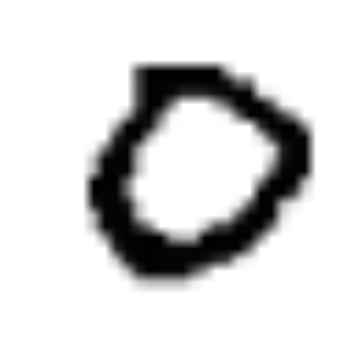

In [11]:
x_img = x.reshape(28,28)

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
#plt.imshow(x_img, cmap = 'jet', interpolation='nearest')
plt.imshow(x_img, cmap = 'binary')#, interpolation='nearest')
plt.axis('off')

In [12]:
y.loc[5000]

0.0

In [13]:
train_x, test_x, train_y, test_y = X.iloc[:60000,], X.iloc[60000:,], y[:60000], y[60000:]

In [14]:
import numpy as np
indexes = np.random.permutation(60000)

train_x, train_y = train_x.iloc[indexes,], train_y[indexes]

In [15]:
train_x.iloc[:5,:10]

,0,1,2,3,4,5,6,7,8,9
26814,0,0,0,0,0,0,0,0,0,0
38989,0,0,0,0,0,0,0,0,0,0
20686,0,0,0,0,0,0,0,0,0,0
36940,0,0,0,0,0,0,0,0,0,0
53775,0,0,0,0,0,0,0,0,0,0


In [16]:
train_y_0 = (train_y == 0)
test_y_0 = (test_y == 0)

In [17]:
type(train_y_0)

pandas.core.series.Series

In [18]:
train_y_0.shape

(60000,)

In [19]:
train_y_0.value_counts()

False    54077
True      5923
dtype: int64

In [20]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=10)

clf.fit(train_x, train_y_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=10, shuffle=True, verbose=0,
       warm_start=False)

In [21]:
clf.predict(x)

C:\Users\PratikGandhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, train_x, train_y_0, cv=10, scoring = 'accuracy')

array([ 0.98783536,  0.98966839,  0.98850192,  0.962     ,  0.98366667,
        0.98116667,  0.95183333,  0.98933156,  0.99049842,  0.98633106])

In [24]:
from sklearn.model_selection import cross_val_predict

cross_pred = cross_val_predict(clf, train_x, train_y_0, cv=10)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_0, cross_pred)

array([[53869,   208],
       [  927,  4996]])

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(train_y_0, cross_pred)
prec = precision_score(train_y_0, cross_pred)
rec = recall_score(train_y_0, cross_pred)

In [32]:
print(acc, prec, rec)

0.981083333333 0.96003074558 0.843491473915


In [33]:
from sklearn.metrics import f1_score

f1 = f1_score(train_y_0, cross_pred)
f1

0.89799586591174629

In [42]:
cross_scores = cross_val_predict(clf, train_x, train_y_0, cv=10, method='decision_function')
cross_scores.shape

(60000,)

In [43]:
from sklearn.metrics import precision_recall_curve

precs, recs,thresh = precision_recall_curve(train_y_0,cross_scores)

In [49]:
np.amax(cross_scores)

781410.23833219765

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    

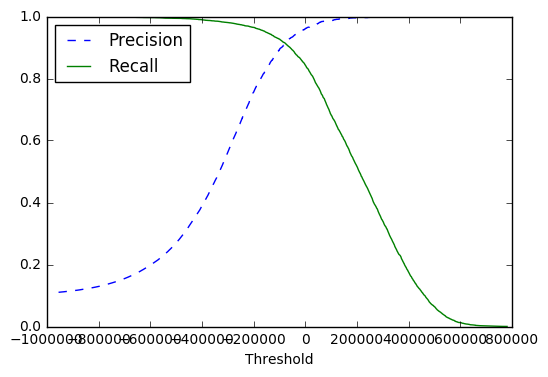

In [57]:
plot_precision_recall_vs_threshold(precs, recs, thresh)

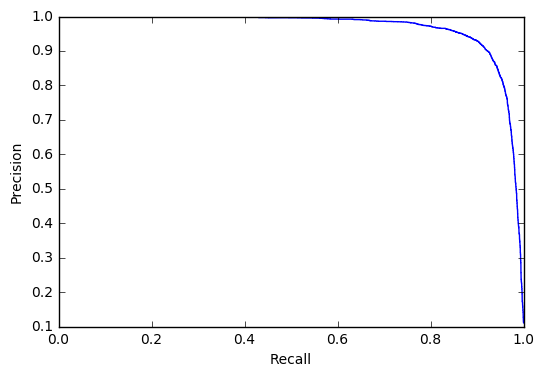

In [68]:
plt.plot(recs, precs)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [58]:
pred_prec = (cross_scores > 10000)

In [60]:
precision_score(train_y_0, pred_prec)

0.96532131661442011

In [61]:
recall_score(train_y_0, pred_prec)

0.83184197197366194

In [62]:
    from sklearn.metrics import roc_curve
    
    fpr, tpr, thresh = roc_curve(train_y_0, cross_scores)

In [63]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

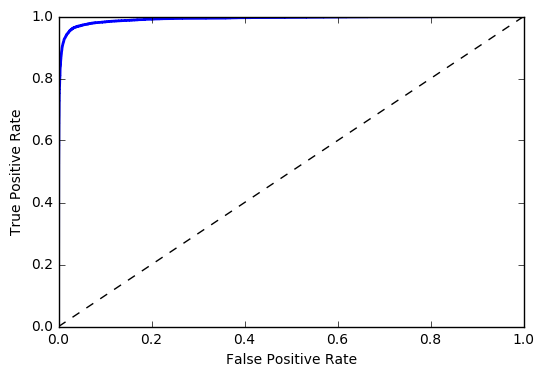

In [64]:
plot_roc_curve(fpr, tpr)
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_y_0, cross_scores)

0.99222151731285313

In [69]:
from sklearn.metrics import average_precision_score

average_precision_score(train_y_0, cross_scores)

0.96522229408556182

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 10)
cross_probs = cross_val_predict(rf_clf, train_x, train_y_0, cv=10, method='predict_proba')

In [75]:
forest_scores = cross_probs[:,1]

In [76]:
prec, rec, thresh = precision_recall_curve(train_y_0, forest_scores)

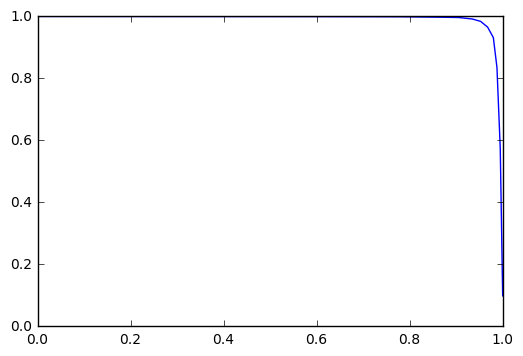

In [77]:
plt.plot(rec,prec)

In [78]:
fpr, tpr, thresh = roc_curve(train_y_0, forest_scores)

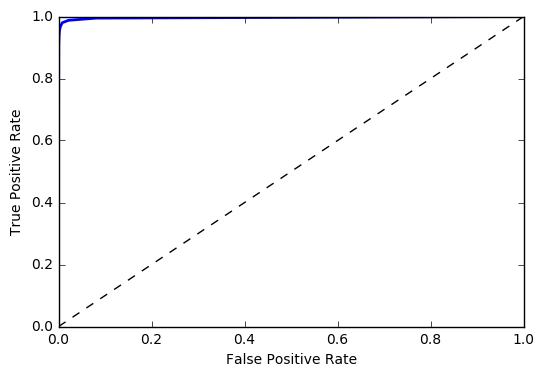

In [79]:
plot_roc_curve(fpr, tpr)

In [80]:
roc_auc_score(train_y_0, forest_scores)

0.99649715498910996

In [81]:
average_precision_score(train_y_0, forest_scores)

0.99155991582068137

In [82]:
cross_val_score(rf_clf, train_x, train_y_0, cv=10, scoring = 'f1')

array([ 0.96173913,  0.95986038,  0.95750217,  0.96527778,  0.96533795,
        0.96623377,  0.96257615,  0.96695652,  0.96701389,  0.95104895])

In [89]:
#cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy')
pred = cross_val_predict(clf, train_x, train_y, cv=10, method='predict')
rf_pred= cross_val_predict(rf_clf, train_x, train_y, cv=10, method='predict')

In [97]:
acc1 = accuracy_score(train_y, pred)
acc2 = accuracy_score(train_y, rf_pred)
prec1 = precision_score(train_y, pred, average = 'macro')#'macro')
prec2 = precision_score(train_y, rf_pred, average = 'macro')#'macro')
rec1 = recall_score(train_y, pred, average= 'macro')#'macro')
rec2 = recall_score(train_y, rf_pred, average = 'macro')#'macro')

In [98]:
print(acc1, acc2)
print(prec1, prec2)
print(rec1, rec2)

0.862416666667 0.94675
0.862699458719 0.946271631001
0.860276310607 0.946086364202
